In [ ]:
# CODE FOR NON NEGATIVE MATRIX FACTORIZATION

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

jokes = pd.read_csv('jester-data-1.csv')
print('Number of Ratings:'+str(len(jokes)))
print(jokes.head(10))

Number of Ratings:24983
   Joke1  Joke2  Joke3  Joke4  Joke5  ...  Joke96  Joke97  Joke98  Joke99  Joke100
0  -7.82   8.79  -9.66  -8.16  -7.52  ...   99.00   -5.63   99.00   99.00    99.00
1   4.08  -0.29   6.36   4.37  -2.38  ...   -2.14    3.06    0.34   -4.32     1.07
2  99.00  99.00  99.00  99.00   9.03  ...   99.00   99.00   99.00   99.00    99.00
3  99.00   8.35  99.00  99.00   1.80  ...   99.00   99.00   99.00   99.00    99.00
4   8.50   4.61  -4.17  -5.39   1.36  ...    1.55    3.11    6.55    1.80     1.60
5  -6.17  -3.54   0.44  -8.50  -7.09  ...   -3.35    0.05   -9.08   -5.05    -3.45
6  99.00  99.00  99.00  99.00   8.59  ...    2.33   99.00   99.00   99.00    99.00
7   6.84   3.16   9.17  -6.21  -8.16  ...   -3.35    2.14   -0.05    1.31     0.00
8  -3.79  -3.54  -9.42  -6.89  -8.74  ...   -0.29   -0.29   -0.29   -3.40    -4.95
9   3.01   5.15   5.15   3.01   6.41  ...   99.00   99.00   99.00   99.00    99.00

[10 rows x 100 columns]


In [ ]:
#scaling negative data for non negative matrix factorization
jokes_array = np.array(jokes)
n = jokes_array.shape[0]
m = jokes_array.shape[1]
for i in range(n):
  for j in range(m):
    if(jokes_array[i][j]!=99):
      jokes_array[i][j] = jokes_array[i][j] + 10
    

In [ ]:
#replace missing values with mean
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

mean_simple_imputer = SimpleImputer(missing_values=99, strategy='mean')
jokes_mean_imputed = mean_simple_imputer.fit_transform(jokes_array)

no_of_99_jokes = np.sum(np.count_nonzero(jokes_mean_imputed == 99, axis=0))

In [ ]:
print(jokes_mean_imputed)

[[ 2.18       18.79        0.34       ... 10.76769173  9.96875619
  11.35471085]
 [14.08        9.71       16.36       ... 10.34        5.68
  11.07      ]
 [10.9045733  10.20845963 10.31657433 ... 10.76769173  9.96875619
  11.35471085]
 ...
 [10.9045733  10.20845963 10.31657433 ... 10.76769173  9.96875619
  11.35471085]
 [10.9045733  10.20845963 10.31657433 ... 10.76769173  9.96875619
  11.35471085]
 [12.43       12.67        6.02       ... 10.76769173  9.96875619
  11.35471085]]


In [ ]:
import numpy as np
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(jokes_mean_imputed)
H = model.components_

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [ ]:
jokes_predicted = np.dot(W,H)
# print(jokes_predicted)
# print(jokes_predicted.shape[1])

In [ ]:
print(jokes_mean_imputed)

[[ 2.18       18.79        0.34       ... 10.76769173  9.96875619
  11.35471085]
 [14.08        9.71       16.36       ... 10.34        5.68
  11.07      ]
 [10.9045733  10.20845963 10.31657433 ... 10.76769173  9.96875619
  11.35471085]
 ...
 [10.9045733  10.20845963 10.31657433 ... 10.76769173  9.96875619
  11.35471085]
 [10.9045733  10.20845963 10.31657433 ... 10.76769173  9.96875619
  11.35471085]
 [12.43       12.67        6.02       ... 10.76769173  9.96875619
  11.35471085]]


In [ ]:
# jokes_array = np.array(jokes)
n = jokes_array.shape[0]
m = jokes_array.shape[1]
sum_l1 = 0
count_l1 = 0
for i in range(n):
  for j in range(m):
    if(jokes_array[i][j]!=99):
      sum_l1 += np.abs(jokes_predicted[i][j]-jokes_mean_imputed[i][j])
      count_l1 += 1


In [ ]:
l1 = sum_l1/count_l1
print("L1 norm")
print(l1)

L1 norm
3.369410466353286


In [ ]:
# jokes_array = np.array(jokes)
n = jokes_array.shape[0]
m = jokes_array.shape[1]
sum_l2 = 0
count_l2 = 0
for i in range(n):
  for j in range(m):
    if(jokes_array[i][j]!=99):
      sum_l2 += (jokes_predicted[i][j]-jokes_mean_imputed[i][j])**2
      count_l2 += 1

In [ ]:
print("Frobenius or L2 squared")
l2 = sum_l2/count_l2
print(l2)

Frobenius or L2 squared
17.909580717263324


In [ ]:
#VARYING NUMBER OF STEPS
jokes_predicted=[]
import numpy as np
from sklearn.decomposition import NMF
steps = [10,20,30,40,50,60,70,80,90,100]
for i in steps:
  model = NMF(n_components=2, init='random', random_state=0, max_iter = i)
  W = model.fit_transform(jokes_mean_imputed)
  H = model.components_
  jokes_predicted.append(np.dot(W,H))

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 10 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 30 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 40 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-

In [ ]:
# jokes_array = np.array(jokes)
n = jokes_array.shape[0]
m = jokes_array.shape[1]
sum_l2 = 0
count_l2 = 0
l2_losses =[]
# print(jokes_predicted)
for k in range(len(jokes_predicted)):
  for i in range(n):
    for j in range(m):
      if(jokes_array[i][j]!=99):
        sum_l2 += (jokes_predicted[k][i][j]-jokes_mean_imputed[i][j])**2
        count_l2 += 1
  l2_losses.append(sum_l2/count_l2)

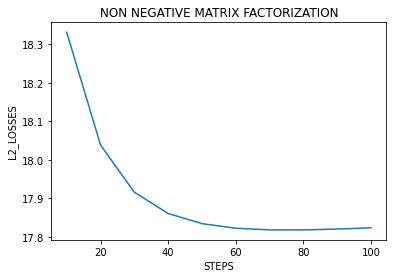

In [ ]:
import matplotlib.pyplot as plt

plt.plot(steps, l2_losses)
plt.title('NON NEGATIVE MATRIX FACTORIZATION')
plt.xlabel('STEPS')
plt.ylabel('L2_LOSSES')
plt.show()

In [ ]:
#VARYING NUMBER OF COMPONENTS
jokes_predicted=[]
import numpy as np
from sklearn.decomposition import NMF
components = [2,6,10,14,18,22,26,30]
for i in components:
  model = NMF(n_components= i, init='random', random_state=0, max_iter = 200)
  W = model.fit_transform(jokes_mean_imputed)
  H = model.components_
  jokes_predicted.append(np.dot(W,H))

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/

In [ ]:
# jokes_array = np.array(jokes)
n = jokes_array.shape[0]
m = jokes_array.shape[1]
sum_l2 = 0
count_l2 = 0
l2_losses =[]
# print(jokes_predicted)
for k in range(len(jokes_predicted)):
  for i in range(n):
    for j in range(m):
      if(jokes_array[i][j]!=99):
        sum_l2 += (jokes_predicted[k][i][j]-jokes_mean_imputed[i][j])**2
        count_l2 += 1
  l2_losses.append(sum_l2/count_l2)

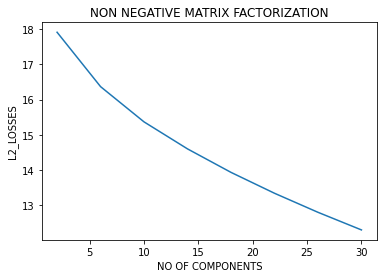

In [ ]:
import matplotlib.pyplot as plt

plt.plot(components, l2_losses)
plt.title('NON NEGATIVE MATRIX FACTORIZATION')
plt.xlabel('NO OF COMPONENTS')
plt.ylabel('L2_LOSSES')
plt.show()

In [ ]:
# CODE FOR MATRIX FACTORIZATION

In [ ]:
import numpy
import numpy as np
import pandas as pd
import progressbar as pb
def matrix_factorization(R, P, Q, K, steps=10, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in pb.progressbar(range(steps)):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        if e < 0.001:
            break
    return P, Q.T

In [ ]:
R = jokes_mean_imputed

In [ ]:
N = len(R)
M = len(R[0])
K = 2

In [ ]:
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

In [ ]:
nP, nQ = matrix_factorization(R, P, Q, K)
nR = numpy.dot(nP, nQ.T)

100% (10 of 10) |########################| Elapsed Time: 0:11:06 Time:  0:11:06


In [ ]:
print(nR)

[[ 9.46774909  9.00068556  9.00790565 ...  9.38109243  8.60772599
   9.73136909]
 [11.98679606 11.37998696 11.41771389 ... 11.85071525 10.89741506
  12.3008527 ]
 [12.60186994 12.01435767 11.9608627  ... 12.54473578 11.45833319
  12.99625367]
 ...
 [10.46667232  9.91160319  9.99111824 ... 10.30489001  9.51457132
  10.70879976]
 [10.73222003 10.13236526 10.27061026 ... 10.51402112  9.75490222
  10.94139942]
 [12.07015952 11.42653692 11.52473042 ... 11.87759959 10.97207571
  12.34490259]]


In [ ]:
# jokes_array = np.array(jokes)
n = jokes_array.shape[0]
m = jokes_array.shape[1]
sum_l1 = 0
count_l1 = 0
for i in range(n):
  for j in range(m):
    if(jokes_array[i][j]!=99):
      sum_l1 += np.abs(nR[i][j]-jokes_mean_imputed[i][j])
      count_l1 += 1


In [ ]:
l1 = sum_l1/count_l1
print(l1)

3.6313598749445783


In [ ]:
# jokes_array = np.array(jokes)
n = jokes_array.shape[0]
m = jokes_array.shape[1]
sum_l2 = 0
count_l2 = 0
for i in range(n):
  for j in range(m):
    if(jokes_array[i][j]!=99):
      sum_l2 += (nR[i][j]-jokes_mean_imputed[i][j])**2
      count_l2 += 1


In [ ]:
l2 = sum_l2/count_l2
print(l2)

20.238557035758223


In [ ]:
import numpy
import numpy as np
import pandas as pd
import progressbar as pb
def matrix_factorization(R, P, Q, K, steps=10, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in pb.progressbar(range(steps)):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        if e < 0.001:
            break
    return P, Q.T

In [ ]:
steps = [10,20,30,40,50,60,70,80,90,100]
nR= []
for i in steps:
  nP, nQ = matrix_factorization(R, P, Q, K, i)
  nR.append(numpy.dot(nP, nQ.T))

In [ ]:
# jokes_array = np.array(jokes)
n = jokes_array.shape[0]
m = jokes_array.shape[1]
sum_l2 = 0
count_l2 = 0
l2_losses = []
for k in range(len(nR)):
  for i in range(n):
    for j in range(m):
      if(jokes_array[i][j]!=99):
        sum_l2 += (nR[k][i][j]-jokes_mean_imputed[i][j])**2
        count_l2 += 1
    l2_losses.append(sum_l2/count_l2)


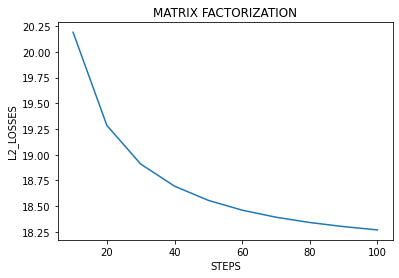

In [ ]:
import matplotlib.pyplot as plt

plt.plot(steps, l2_losses)
plt.title('MATRIX FACTORIZATION')
plt.xlabel('STEPS')
plt.ylabel('L2_LOSSES')
plt.show()